In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Adding library directory to python search path
import os
import sys
import git

repo = git.Repo('.', search_parent_directories=True)
library_dir = repo.working_tree_dir + '/lib'
sys.path.insert(0, library_dir)

import miptlib as mipt

In [3]:
Ra = mipt.read_excel('../data/Ra.xlsx', usecols=[0,1], header=[5])
Ra

,Channel,Counts
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
4091,4092,0
4092,4093,0
4093,4094,0
4094,4095,0


(1400.0, 3000.0)

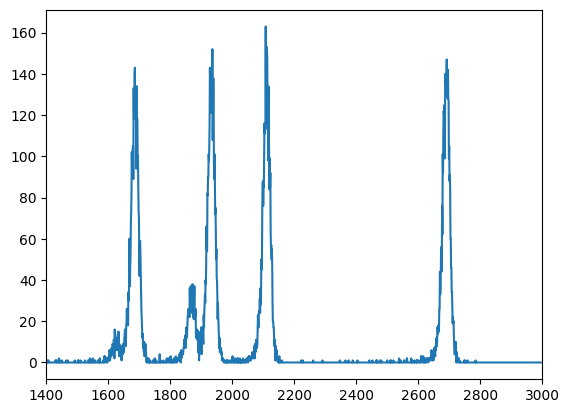

In [4]:
channels = Ra['Channel']
counts = Ra['Counts']

mipt.plot(channels, counts, func=None, unique_marker='-')
plt.xlim(1400, 3000)